In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import plotly.graph_objects as go
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

In [31]:
train = pd.read_csv('C:\\Users\\odoru\\SIGNATE\\train.csv')
test = pd.read_csv('C:\\Users\\odoru\\SIGNATE\\test.csv')
submit = pd.read_csv('C:\\Users\\odoru\\SIGNATE\\head_submit_sample.csv')

# EDA

In [32]:
train.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,31,services,married,secondary,no,12294,yes,no,cellular,21,nov,101,3,498,0,other,0
1,1,29,entrepreneur,single,tertiary,no,43027,no,no,cellular,22,aug,158,2,702,0,unknown,1
2,2,35,management,married,tertiary,no,12252,yes,no,cellular,11,nov,351,1,826,0,failure,0
3,3,31,technician,married,secondary,no,99121,yes,yes,unknown,16,may,658,2,120,0,failure,0
4,4,48,unemployed,married,primary,no,42005,yes,no,telephone,3,apr,177,1,273,0,unknown,0


In [33]:
print(len(train.columns))
print(len(test.columns))
print(len(submit.columns))

18
17
2


In [34]:
test

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,0,35,technician,single,secondary,no,89043,no,no,cellular,7,feb,101,2,184,2,success
1,1,37,services,married,secondary,no,64372,yes,no,cellular,7,jul,158,3,241,0,unknown
2,2,31,services,single,secondary,no,31606,yes,no,unknown,15,may,152,2,47,0,unknown
3,3,31,admin.,married,secondary,no,94826,yes,no,cellular,27,may,345,2,490,0,unknown
4,4,32,services,married,secondary,no,100401,no,no,cellular,7,jan,126,1,686,0,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18045,18045,49,self-employed,married,tertiary,no,98357,yes,no,cellular,6,jul,101,2,417,0,failure
18046,18046,34,blue-collar,married,secondary,no,29621,yes,no,cellular,12,may,345,1,815,0,unknown
18047,18047,34,admin.,single,secondary,no,94260,yes,no,unknown,16,may,121,2,370,0,unknown
18048,18048,31,technician,single,secondary,no,65483,yes,no,unknown,15,may,345,2,41,0,unknown


In [35]:
submit

,0,0.1
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
18044,18045,0
18045,18046,0
18046,18047,0
18047,18048,0


In [36]:
test.tail()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
18045,18045,49,self-employed,married,tertiary,no,98357,yes,no,cellular,6,jul,101,2,417,0,failure
18046,18046,34,blue-collar,married,secondary,no,29621,yes,no,cellular,12,may,345,1,815,0,unknown
18047,18047,34,admin.,single,secondary,no,94260,yes,no,unknown,16,may,121,2,370,0,unknown
18048,18048,31,technician,single,secondary,no,65483,yes,no,unknown,15,may,345,2,41,0,unknown
18049,18049,30,retired,married,primary,no,6474,no,no,cellular,13,aug,158,1,699,0,unknown


In [37]:
submit.tail()

,0,0.1
18044,18045,0
18045,18046,0
18046,18047,0
18047,18048,0
18048,18049,0


In [38]:
#set_test_id = set(list(test['id'].values))
#set_submit_id = set(list(submit['0'].values))

#diff = (set_submit_id.symmetric_difference(set_test_id))
#print(diff)

In [39]:
#test = test.drop(test.index[0])
##test

In [40]:
#set_test_id = set(list(test['id'].values))
#set_submit_id = set(list(submit['0'].values))

#diff = (set_submit_id.symmetric_difference(set_test_id))
#print(diff)

In [41]:
print(train.shape)
print(test.shape)
print(submit.shape)

(27100, 18)
(18050, 17)
(18049, 2)


In [42]:
#重複の確認
datas = [train,test]

for data in datas:
    print(data['id'].unique())

[    0     1     2 ... 27097 27098 27099]
[    0     1     2 ... 18047 18048 18049]


In [43]:
#欠損値の確認
for data in datas:
    print(data.isnull().sum())

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64


In [44]:
datas = ['train','test']
cols = list(train.columns)


for c in cols:
    counts = 0
    for i in range(len(train)):
        if train[c].iloc[i] == 'unknown':
            counts += 1
        else:
            pass
    print(f'train {c} has {counts}')
    
print('------------------------------')
    
cols = list(test.columns)
for c in cols:
    counts = 0
    for i in range(len(test)):
        if test[c].iloc[i] == 'unknown':
            counts += 1
        else:
            pass
    print(f'test {c} has {counts}')   


train id has 0
train age has 0
train job has 0
train marital has 0
train education has 1079
train default has 0
train balance has 0
train housing has 0
train loan has 0
train contact has 6849
train day has 0
train month has 0
train duration has 0
train campaign has 0
train pdays has 0
train previous has 0
train poutcome has 23099
train y has 0
------------------------------
test id has 0
test age has 0
test job has 1
test marital has 0
test education has 692
test default has 0
test balance has 0
test housing has 0
test loan has 0
test contact has 4671
test day has 0
test month has 0
test duration has 0
test campaign has 0
test pdays has 0
test previous has 0
test poutcome has 15426


In [45]:
print(test['job'].value_counts())
test.replace({'job': {'unknown':'blue-collar'}}, inplace=True)
print('-----------')
print(test['job'].value_counts())

blue-collar      4086
management       3527
technician       3213
admin.           2152
services         1721
entrepreneur      729
self-employed     727
retired           657
unemployed        511
housemaid         496
student           230
unknown             1
Name: job, dtype: int64
-----------
blue-collar      4087
management       3527
technician       3213
admin.           2152
services         1721
entrepreneur      729
self-employed     727
retired           657
unemployed        511
housemaid         496
student           230
Name: job, dtype: int64


In [46]:
#各データセットの作成
train_x = train.iloc[:,1:17]
train_y = train['y']
test_x = test.iloc[:,1:]

In [47]:
train_x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,31,services,married,secondary,no,12294,yes,no,cellular,21,nov,101,3,498,0,other
1,29,entrepreneur,single,tertiary,no,43027,no,no,cellular,22,aug,158,2,702,0,unknown
2,35,management,married,tertiary,no,12252,yes,no,cellular,11,nov,351,1,826,0,failure
3,31,technician,married,secondary,no,99121,yes,yes,unknown,16,may,658,2,120,0,failure
4,48,unemployed,married,primary,no,42005,yes,no,telephone,3,apr,177,1,273,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27095,37,blue-collar,married,secondary,no,26661,yes,no,cellular,27,may,345,4,425,0,unknown
27096,35,services,married,secondary,no,42150,yes,no,cellular,27,may,121,1,719,0,unknown
27097,35,services,married,unknown,no,34531,no,no,cellular,28,jun,177,2,121,0,unknown
27098,30,admin.,single,secondary,no,99621,yes,no,cellular,27,may,121,1,100,0,unknown


In [48]:
test_x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,35,technician,single,secondary,no,89043,no,no,cellular,7,feb,101,2,184,2,success
1,37,services,married,secondary,no,64372,yes,no,cellular,7,jul,158,3,241,0,unknown
2,31,services,single,secondary,no,31606,yes,no,unknown,15,may,152,2,47,0,unknown
3,31,admin.,married,secondary,no,94826,yes,no,cellular,27,may,345,2,490,0,unknown
4,32,services,married,secondary,no,100401,no,no,cellular,7,jan,126,1,686,0,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18045,49,self-employed,married,tertiary,no,98357,yes,no,cellular,6,jul,101,2,417,0,failure
18046,34,blue-collar,married,secondary,no,29621,yes,no,cellular,12,may,345,1,815,0,unknown
18047,34,admin.,single,secondary,no,94260,yes,no,unknown,16,may,121,2,370,0,unknown
18048,31,technician,single,secondary,no,65483,yes,no,unknown,15,may,345,2,41,0,unknown


In [49]:
cat_cols = ['job','marital','education','default','housing','loan','contact','month','poutcome']


for c in cat_cols:
    le = LabelEncoder()
    le.fit(train_x[c])
    train_x[c] = le.transform(train_x[c])
    test_x[c] = le.transform(test_x[c])

In [50]:
submit

,0,0.1
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
18044,18045,0
18045,18046,0
18046,18047,0
18047,18048,0


In [51]:
kf = KFold(n_splits=4, shuffle=True, random_state=71)
tr_idx, va_idx = list(kf.split(train_x))[0]

tr_x,va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]
tr_y,va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]

In [52]:
d_train = xgb.DMatrix(tr_x, label=tr_y)
d_valid = xgb.DMatrix(va_x, label=va_y)
d_test = xgb.DMatrix(test_x)

params = {'objective':'binary:logistic','silent':1, 'random_state':71, 'eta':0.1}

num_round = 500

watchilist = [(d_train,'train'),(d_valid,'eval')]

model = xgb.train(params,d_train, num_round, evals = watchilist, early_stopping_rounds=20 )

val_pred = model.predict(d_valid, ntree_limit = model.best_ntree_limit)

score = log_loss(va_y,val_pred)

print(score)

[20:13:44] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-error:0.06814	eval-error:0.07026
Multiple eval metrics have been passed: 'eval-error' will be used for early stopping.

Will train until eval-error hasn't improved in 20 rounds.
[1]	train-error:0.06873	eval-error:0.06967
[2]	train-error:0.06839	eval-error:0.06967
[3]	train-error:0.06829	eval-error:0.06952
[4]	train-error:0.06809	eval-error:0.06967
[5]	train-error:0.06829	eval-error:0.06952
[6]	train-error:0.06804	eval-error:0.06864
[7]	train-error:0.06691	eval-error:0.06982
[8]	train-error:0.06686	eval-error:0.06996
[9]	train-error:0.06701	eval-error:0.06996
[10]	train-error:0.06686	eval-error:0.069

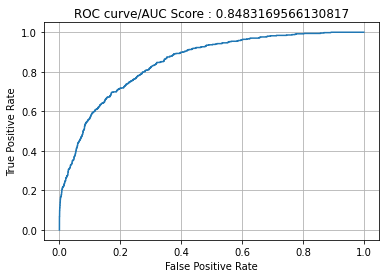

In [53]:
fig = plt.figure()

fpr,tpr,thresholds = roc_curve(va_y,val_pred)
auc_score = roc_auc_score(va_y,val_pred)

plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC curve/AUC Score : {auc_score}')

plt.grid(True)

In [54]:
test

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,0,35,technician,single,secondary,no,89043,no,no,cellular,7,feb,101,2,184,2,success
1,1,37,services,married,secondary,no,64372,yes,no,cellular,7,jul,158,3,241,0,unknown
2,2,31,services,single,secondary,no,31606,yes,no,unknown,15,may,152,2,47,0,unknown
3,3,31,admin.,married,secondary,no,94826,yes,no,cellular,27,may,345,2,490,0,unknown
4,4,32,services,married,secondary,no,100401,no,no,cellular,7,jan,126,1,686,0,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18045,18045,49,self-employed,married,tertiary,no,98357,yes,no,cellular,6,jul,101,2,417,0,failure
18046,18046,34,blue-collar,married,secondary,no,29621,yes,no,cellular,12,may,345,1,815,0,unknown
18047,18047,34,admin.,single,secondary,no,94260,yes,no,unknown,16,may,121,2,370,0,unknown
18048,18048,31,technician,single,secondary,no,65483,yes,no,unknown,15,may,345,2,41,0,unknown


In [55]:
len(test['id'])

18050

In [56]:
submit

,0,0.1
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
18044,18045,0
18045,18046,0
18046,18047,0
18047,18048,0


In [57]:
test_pred = model.predict(d_test,ntree_limit=model.best_ntree_limit)
print(len(test_pred))

18050


In [58]:
#submit.columns = ['0','1']
#submit

In [59]:
submit.columns

Index(['0', '0.1'], dtype='object')

In [60]:
#submit['0'] = test['id'].values
#submit

In [61]:
id = test['id']
test_pred = pd.Series(test_pred)
pred = test_pred

submit = pd.concat([id,pred], axis=1)
submit.columns = ['id', 'y']
submit

,id,y
0,0,0.795398
1,1,0.062004
2,2,0.034767
3,3,0.005060
4,4,0.059195
...,...,...
18045,18045,0.018721
18046,18046,0.011260
18047,18047,0.079379
18048,18048,0.006865


In [62]:
#submit['0.1'] = test_pred

In [63]:
id = test['id']
test_pred = pd.Series(test_pred)
pred = test_pred

submit = pd.concat([id,pred], axis=1)
submit.columns = ['id', 'y']
submit

,id,y
0,0,0.795398
1,1,0.062004
2,2,0.034767
3,3,0.005060
4,4,0.059195
...,...,...
18045,18045,0.018721
18046,18046,0.011260
18047,18047,0.079379
18048,18048,0.006865


In [64]:
submit.to_csv('submit_sample.csv',index=False, header=False)